# Decision Tree

## Stroke Prediction using Decision Tree

### Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

### Dataset Overview

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


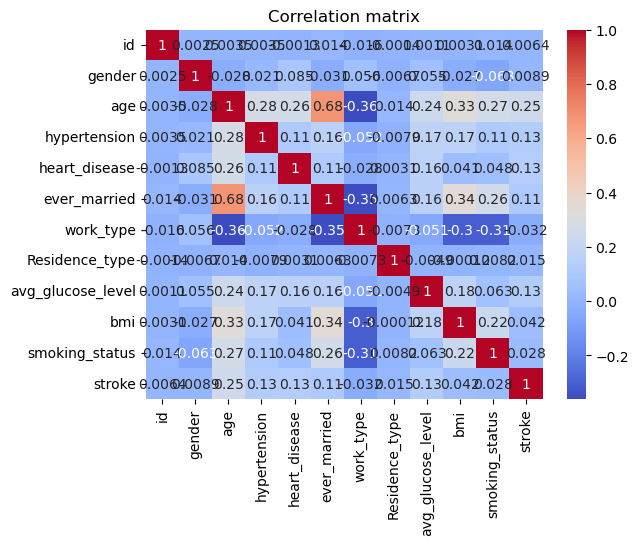

In [4]:
# Load the dataset
df = pd.read_csv("data/healthcare-dataset-stroke-data.csv")

# Print the first few rows of the dataset
print(df.head())

# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the gender column
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])

# Plot a heatmap of the correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation matrix")
plt.show()

### Decision Tree Prediction

Firstly, using all parameters to make prediction: 

In [5]:
df_num = df.dropna()
X, y = df_num[['id','gender','age', 'hypertension', 'heart_disease','ever_married','work_type','Residence_type', 'avg_glucose_level', 'bmi','smoking_status',]], df_num['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

# Create a decision tree model
model = DecisionTreeClassifier(max_depth=5)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9541751527494908


But according to the correlation matrix, only "age" have comparably high correlation. So, we just use "age" to predict.

In [7]:
# Load the dataset
df = pd.read_csv("data/healthcare-dataset-stroke-data.csv")

df_num = df.dropna()
X, y = df_num[['age']], df_num['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

# Create a decision tree model
model = DecisionTreeClassifier(max_depth=5)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.960285132382892


# Random Forest

In [8]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the stroke prediction dataset
df = pd.read_csv("data/healthcare-dataset-stroke-data.csv")
# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the gender column
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])

# Drop rows with missing values
df.dropna(inplace=True)

# Split the dataset into training and testing sets
X = df.drop(['stroke'], axis=1)
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

# Create a random forest model with 100 trees
model = RandomForestClassifier(n_estimators=70)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9582484725050916


In [9]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the stroke prediction dataset
df = pd.read_csv("data/healthcare-dataset-stroke-data.csv")
# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the gender column
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])

# Drop null values
df = df.dropna()

# Select only the 'age' and 'stroke' columns
df_num = df[['age', 'stroke']]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_num[['age']], df_num['stroke'], test_size=0.2, random_state=27)

# Create a Random Forest model with 100 trees
model = RandomForestClassifier(n_estimators=100)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.960285132382892


Using Decision Tree and Random Forest, the best accuracy we can get is around 96%. Based on high percentage of "stroke=0" in this dataset, we think this result is pretty good.